In [4]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.metrics import mean_squared_error

In [71]:
train_data = pd.read_csv("train_tch.csv", skiprows=1, header=None, names=None)

# Labels are in the first column
train_y = train_data.iloc[:,-1]
train_x = train_data.iloc[:,:-1]

display(train_y)
display(train_x)

0           8
1        1357
2        1421
3        1785
4        2841
        ...  
7028    11590
7029     7263
7030     6760
7031     5745
7032     1531
Name: 6, Length: 7033, dtype: int64

,0,1,2,3,4,5
0,1020.4,13.8,86,1.6,0.0,1
1,1020.1,13.9,92,2.3,0.0,6
2,1020.7,14.1,93,2.4,0.0,7
3,1021.3,14.4,92,1.6,0.0,8
4,1021.7,15.0,89,1.6,0.0,9
...,...,...,...,...,...,...
7028,1016.8,18.2,91,0.6,0.0,19
7029,0.0,0.0,0,0.0,0.0,20
7030,1017.3,18.1,91,1.2,1.0,21
7031,1017.4,17.8,91,0.7,1.0,22


In [6]:
'''
# Normalize and split data
scaler = MinMaxScaler()

# store them in this dataframe
train_x=pd.DataFrame(scaler.fit_transform(train_x.astype(float)))
'''

In [25]:
'''
model = SVR(kernel='rbf',
            C=100,
            gamma=0.1,
            epsilon=0.1)

## TODO: Train the model
model.fit(train_x, train_y)
'''

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [73]:
def get_train_data(file_name):
    train_data = pd.read_csv("{}.csv".format(file_name), skiprows=1, header=None, names=None)

    # Labels are in the first column
    train_y = train_data.iloc[:,-1]
    train_x = train_data.iloc[:,:-1]

    # Normalize and split data
    scaler = MinMaxScaler()

    # store them in this dataframe
    train_x=pd.DataFrame(scaler.fit_transform(train_x.astype(float)))
    
    return train_x, train_y
    
    
def get_test_data(file_name):
    # read in test data, assuming it is stored locally
    test_data = pd.read_csv("{}.csv".format(file_name), skiprows=1, header=None, names=None)


    # labels are in the first column
    test_y = test_data.iloc[:,-1]
    test_x = test_data.iloc[:,:-1]
    print(test_x.shape, test_y.shape)
    scaler = MinMaxScaler()
    # store them in this dataframe
    test_x=pd.DataFrame(scaler.fit_transform(test_x.astype(float)))
    return test_x, test_y

def train_model(kernel_type, c_val, gamma_val, epsilon_val, train_data_x, train_data_y):
    model = SVR(kernel=kernel_type,
            C=c_val,
            gamma=gamma_val,
            epsilon=epsilon_val)
    model.fit(train_data_x, train_data_y)
    
    return model

def visualize_result(model, test_x_array, test_y, ax_idx, kernel, c_val, gamma_val, epsilon_val):
    df_pred = pd.DataFrame(model.predict(test_x))
    df_y = pd.DataFrame(test_y)
    

    ax_idx.plot(df_pred[0], label='prediction')
    ax_idx.plot(df_y[6], label='actual')
    ax_idx.set_title('{}, C={}, gamma={}, epsilon={}'.format(kernel, c_val, gamma_val, epsilon_val), fontsize=20)
    ax_idx.legend()
    df_pred.to_csv('param_comparason/{}_{}_C={}_gamma={}_epsilon={}.csv'.format('tch',kernel,c_val, gamma_input, epsilon_input),index=False)
    return df_pred
    

(651, 6) (651,)
RMSE of rbf_C=58560_gamma=0.1_epsilon=0.1 is: 3949.313216387195
RMSE of rbf_C=58570_gamma=0.1_epsilon=0.1 is: 3949.2967332470084
RMSE of rbf_C=58580_gamma=0.1_epsilon=0.1 is: 3949.280034462851


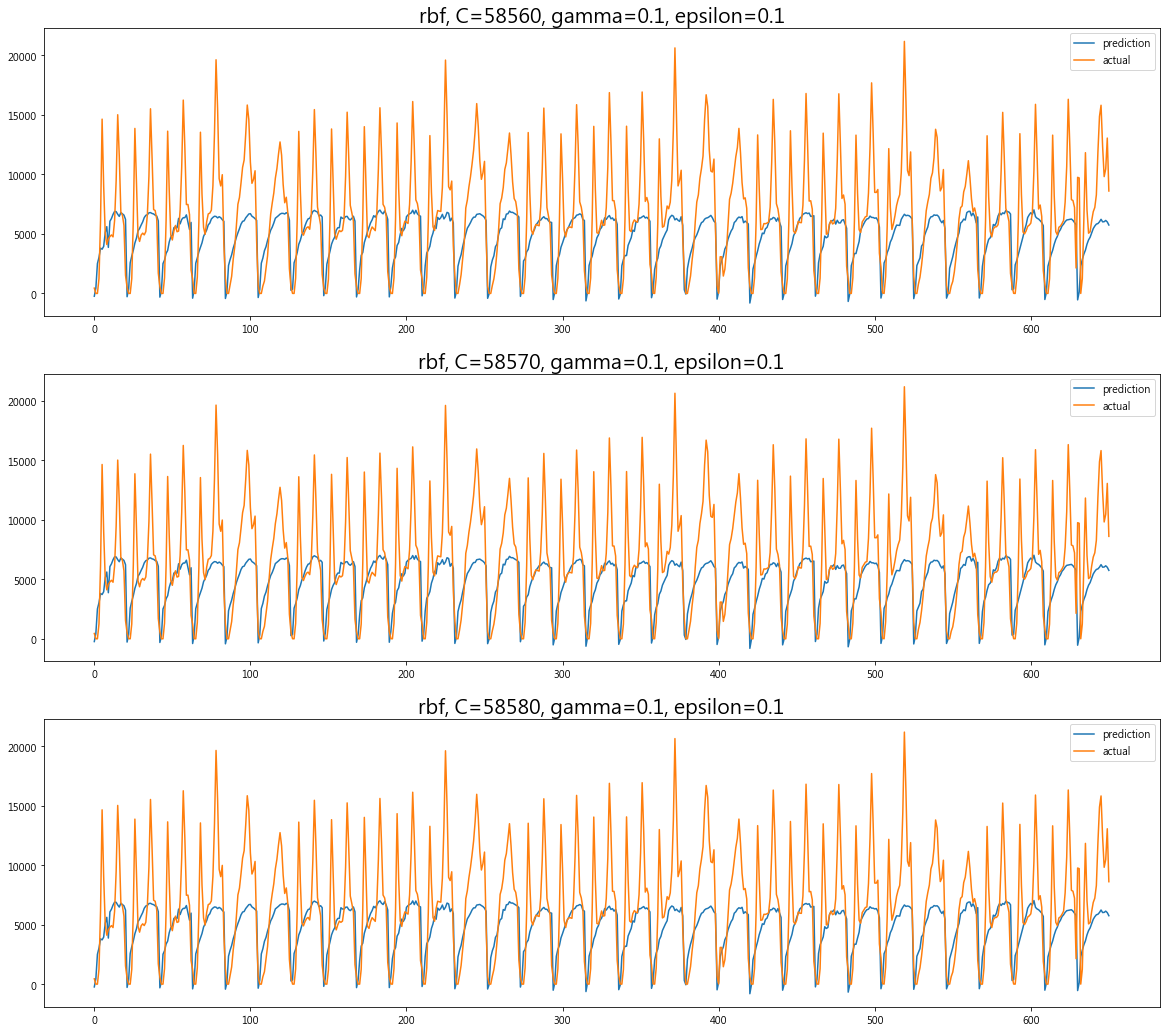

In [75]:

train_x, train_y = get_train_data('train_tch')
test_x, test_y = get_test_data('test_tch')
df_actual = pd.DataFrame(test_y)

'''
model = SVR(kernel='rbf',
            C=100,
            gamma=0.1,
            epsilon=0.1)
'''
gamma_input=0.1
epsilon_input=0.1
kernel='rbf'
#c_input=

idx=0
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(20, 18))
ax_tuple = (ax1, ax2, ax3)

for c_input in [58560, 58570, 58580]:
    model = train_model(kernel_type=kernel, 
                        c_val=c_input, 
                        gamma_val=gamma_input, 
                        epsilon_val=epsilon_input,
                        train_data_x=train_x, 
                        train_data_y=train_y)
    df_pred = visualize_result(model=model, 
                          test_x_array=test_x, 
                          test_y=test_y, 
                          ax_idx=ax_tuple[idx],
                          kernel=kernel, c_val=c_input, gamma_val=gamma_input, epsilon_val=epsilon_input)
    #display(df_pred.head())
    plt.savefig('param_comparason/{}_{}_C={}_gamma={}_epsilon={}.png'.format('tch',kernel,c_input,gamma_input, epsilon_input),
                bbox_inches = 'tight',
                pad_inches = 0.5)
    
    rmse = mean_squared_error(df_actual[6], df_pred[0], squared=False)
    print('RMSE of {}_C={}_gamma={}_epsilon={} is: {}'.format(kernel,
                                                              c_input,
                                                              gamma_input,
                                                              epsilon_input,
                                                              rmse))
    
    
    idx += 1

    


## TODO: Train the model
#model.fit(train_x, train_y)
#visualize_result(test_x, test_y)

In [40]:
import pandas as pd
from sklearn.metrics import mean_squared_error




df_before = pd.read_csv('param_comparason/rbf_C=10000_gamma=0.1_epsilon=0.1.csv')
#display(df_tms.head())
rmse_before = mean_squared_error(df_actual[6], df_before['0'], squared=False)

df_middle = pd.read_csv('param_comparason/rbf_C=1000000_gamma=0.1_epsilon=0.1.csv')
#display(df_tms.head())
rmse_middle = mean_squared_error(df_actual[6], df_middle['0'], squared=False)


#df_after = pd.read_csv('param_comparason/3.rbf_C=100_gamma=0.1_epsilon=1.csv')
#display(df_tms.head())
#rmse_after = mean_squared_error(df_actual[6], df_after['0'], squared=False)

print('The Before RMSE is: {}'.format(rmse_before))
print('The Middle RMSE is: {}'.format(rmse_middle))
#print('The After RMSE is: {}'.format(rmse_after))
#print('Then the RMSE of Taipei City Hall is: {}'.format(rms_tch))

The Before RMSE is: 7423.976205098733
The Middle RMSE is: 13687.90232063981
